In [22]:
import os
import av
import pathlib
import numpy as np
import torch
import argparse
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from datasets import load_dataset
from datasets import Dataset
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")

# NPZ Files

In [12]:

npz_file = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/train/FldgzyEOSH8_373115_380731.npz'
npz_file = "/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/G_QWtUFFAFQ_100000_110000_58e7cf3e46e13dfd851a2932.npz"
npz_file = "/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/G_QWtUFFAFQ_119000_129000_58e7cf3e46e13dfd851a290c.npz"
npz_data = np.load(npz_file)
npz_data.files

['arr_0', 'arr_1']

In [13]:
processed_images = torch.from_numpy(npz_data['arr_0']) 
print(type(processed_images), processed_images.shape)

<class 'torch.Tensor'> torch.Size([8, 3, 224, 224])


In [14]:
processed_captions = torch.from_numpy(npz_data['arr_1'])
print(type(processed_captions), processed_captions.shape)

<class 'torch.Tensor'> torch.Size([11, 1024])


In [15]:
print(processed_captions.shape)

torch.Size([11, 1024])


In [23]:
print(tokenizer.batch_decode(processed_captions, skip_special_tokens=True))

['Josh taps both thumbs on the table and the iPhone screen changes to the NextBus app.', 'A man in a brown shirt sits at a table with an iPhone standing upright near him. He taps both his thumbs on the table, and the iPhone screen switches to displaying the NextBus app.', "A seated individual in a brown shirt repeatedly taps his thumbs on a table. Beside him, an iPhone's screen changes to show the NextBus app.", 'An individual at a table taps their thumbs, causing the iPhone screen next to them to display the NextBus app.', 'In a room with various papers pinned on the wall, a man in a brown shirt taps his thumbs on the table, prompting an iPhone screen to display the NextBus app.', 'The man sitting at the table taps his thumbs rhythmically, and the iPhone screen shifts to the NextBus app.', "A man taps his thumbs on the table, causing the nearby iPhone's screen to switch to the NextBus app.", 'The individual at the table taps both thumbs, making the iPhone next to him display the NextB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


(8, 3, 224, 224)
(3, 224, 224)
(224, 224, 3)


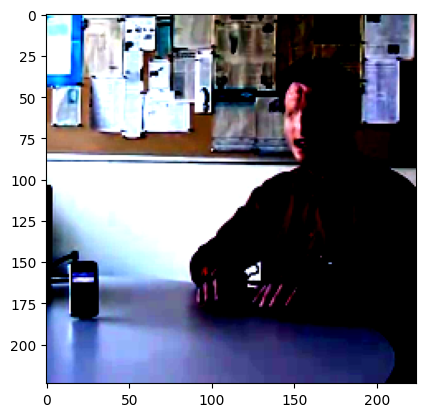

In [16]:
import matplotlib.pyplot as plt

np_images = processed_images.detach().numpy()
an_image = np_images[6]
print(np_images.shape)
print(an_image.shape)

# Transpose channels last to give to imshow
first_image_channel_last = np.transpose(an_image, (1, 2, 0))
print(first_image_channel_last.shape)
plt.imshow(first_image_channel_last)
plt.show()

# NPZ Dataloader with batching

In [17]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class NPZDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.file_names = os.listdir(data_dir)

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.file_names[idx])
        data = np.load(file_path)
        # Assuming each .npz file contains 'data' and 'label'
        sample = {'filenames': self.file_names[idx], 'pixel_values': torch.from_numpy(data['arr_0']), 'labels': torch.from_numpy(data['arr_1'])}
        return sample

In [18]:

# data_dir = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/train'
data_dir = "/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames"
dataset = NPZDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [19]:
len(dataloader)

1

In [21]:
for batch in dataloader:
    filenames, images, captions = batch['filenames'], batch['pixel_values'], batch['labels']
    # Train your model here
    print(filenames, images.shape, captions.shape)

    import sys
    sys.exit

ValueError: This file contains pickled (object) data. If you trust the file you can load it unsafely using the `allow_pickle=` keyword argument or `pickle.load()`.